# Assignment 5


Q1 Consider a periodic square wave with time period T = 2 seconds havingmagnitude 1 between t = 0 s and t = 1 s  
and zero elsewhere. Let g(t) bethe Fourier series representation of the square wave.


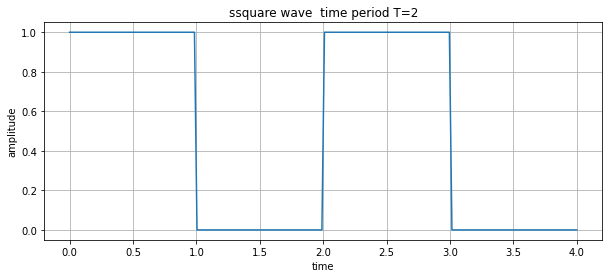

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps 
#warnings.filterwarnings("ignore")

#ploting square wave having time period  T=2
square_wave=[]
x=np.linspace(0,4,200)
for t in x:
    if (t>=0 and t<=1) or (t>=2 and t<=3):
        square_wave.append(1)
        
    else:
        square_wave.append(0)
        
fig=plt.figure(figsize=(10,4)) 
plt.plot(x,square_wave)
plt.title('ssquare wave  time period T=2')
plt.ylabel('amplitude')
plt.xlabel('time')
plt.grid()

(a) Define a function so that you can easily plot g(t) for different numbers of coefficients on the same graph. This plot
is useful to see the emergence of the square wave as the number of terms in the representation increases.


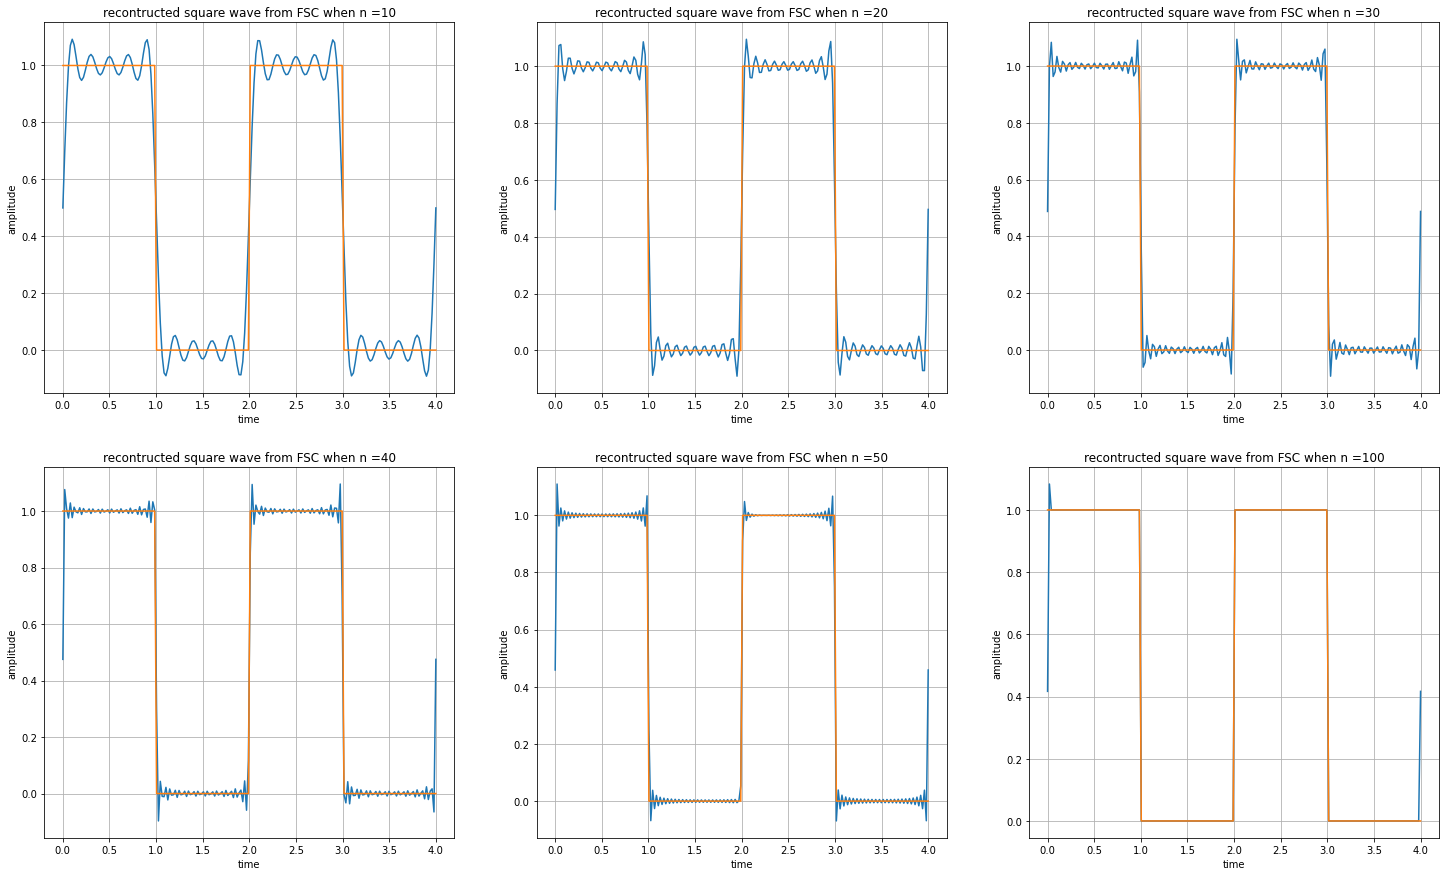

In [20]:
# function for calcualting fourier series cofficent
def fs_cofficent(n,T):
    summation=[]
    a0=1*simps(square_wave,x)/(T)

    L=4
    for k in range(1,n):
        Ak=2.0/L*simps(square_wave*np.cos(2*np.pi*k*x/T),x)
        Bk=2.0/L*simps(square_wave*np.sin(2*np.pi*k*x/T),x)
        summation.append(Ak*np.cos(2*np.pi*k*x/T) + Bk*np.sin(2*np.pi*k*x/T))
        
    cofficent_sum=a0/2+sum(summation)
    return cofficent_sum
N=[10,20,30,40,50,100]
c=1
fig, axs = plt.subplots(2, 3, figsize=(25,15)) 
# from fsc we have to create or reconstruct square wave
for i in N:
    plt.subplot(2,3,c)
    a=fs_cofficent(i,2)
    plt.plot(x,a)
    plt.plot(x,square_wave)
    plt.title('recontructed square wave from FSC when n ='+str(i))
    plt.ylabel('amplitude')
    plt.xlabel('time')
    plt.grid()
    c=c+1


(b) What happens to the Gibbs phenomenon when the number of terms becomes large?

Ans: The Fourier series of a piecewise continuously differentiable periodic function behaves
    at a jump discontinuity. The nth partial sum of the Fourier series has large oscillations near the jump, which might
    increase the maximum of the partial sum above that of the function itself. The overshoot does not die out as n increases, 
    but approaches a finite limit. This sort of behavior was also observed by experimental physicists,
    but was believed to be due to imperfections in the measuring apparatus.
    The Gibbs phenomenon is the step response of a low-pass filter, and the oscillations are called ringing. Truncating the         Fourier series of a periodic signal corresponds to filtering out the higher frequencies by an ideal (brick-wall) low-pass       filter.  

Q2. A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal issampled at 100 times per second for 0.99 seconds
and then its DFT is computed.

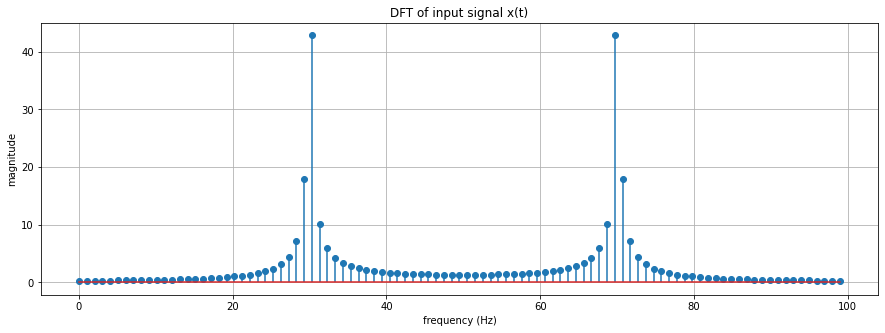

In [21]:
f1=30  #given input signal frequency
fs=100 #sampling frequency
T=0.99    #time period
N=int(T*fs)
t=np.arange(0,T,1/fs)
signal=np.cos(2*np.pi*f1*t)
n=np.arange(0,N)
f=(n*fs)/N
def DFT(x,N):
    a=[]
    for k in range(0,N):
        total=0
        for i in range(0,N):
            total=total+x[i]*np.exp((-1j*k*2*np.pi*i)/N)
        a.append(round(abs(total),2))
    return a  
dft=DFT(signal,N)
fig=plt.figure(figsize=(15,5)) 
plt.stem(f,dft,use_line_collection=True)
plt.title('DFT of input signal x(t)')
plt.ylabel('magnitude')
plt.xlabel('frequency (Hz)')
plt.grid()

  (a) Plot the power spectral density and visualize the Spectral Leakage.


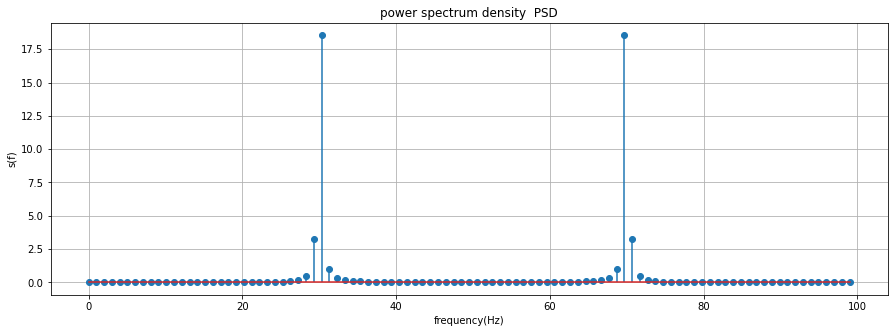

In [22]:
#finding PSD and ploting        
psd=dft*np.conj(dft)/N
fig=plt.figure(figsize=(15,5)) 
plt.stem(f,psd,use_line_collection=True)
plt.title('power spectrum density  PSD')
plt.ylabel('s(f)')
plt.xlabel('frequency(Hz)')
plt.grid()

Spectral Leakage :: In this plot we clerly see that spectral leakage around f=30 Hz is visible clearly. Spectral leakage occurs when a non-integer number of periods of a signal is sent to the DFT. Spectral leakage lets a single-tone signal be spread among several frequencies after the DFT operation

(b) Using various window functions such as Hanning, Hamming, Bartlett etc. try to minimize the Spectral Leakage. 
Show the plots in each case.


In [23]:
#initalizing different window function
def hanning_function(n,M):      #hanning window function
    w=0.5-0.5*np.cos(2*np.pi*n/(M-1))
    return w

def hamming_function(n,M):        # hanning window function
    w=0.53836-0.46164*np.cos(2*np.pi*n/(M-1))
    return w

def bartlett_function(n,M):       # bartlett window function
    w =[]
    for i in n :
        if 0<=i<=M/2-1:
            a1 = 2*i/(M-1)
            w.append(a1)
        if M/2<=i<=M-1:
            a2 = 2- 2*i/(M-1)
            w.append(a2)
    return w


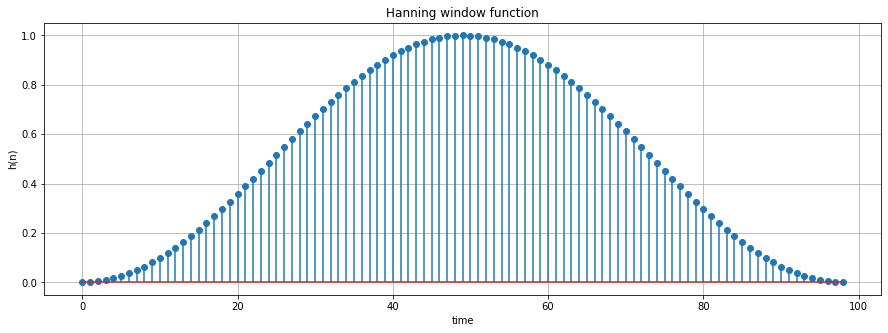

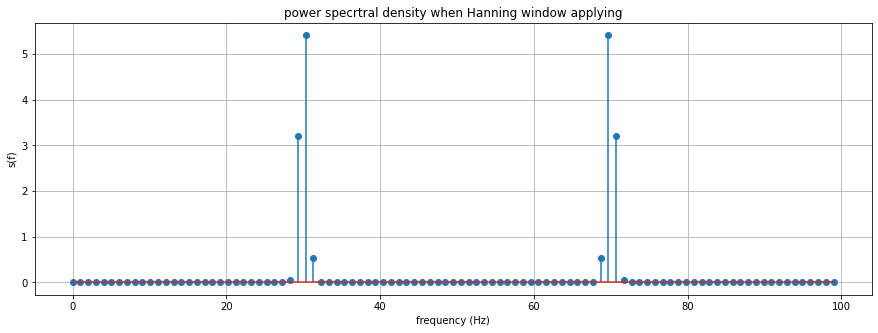

In [24]:
# hanning function 
n=np.arange(0,N,1)
fig=plt.figure(figsize=(15,5))
hann=hanning_function(n,N)
plt.stem(hann,use_line_collection=True)
plt.grid()
plt.title('Hanning window function')
plt.ylabel('h(n)')
plt.xlabel('time')

window =signal*hann
dft=DFT(window,N)
psd=dft*np.conj(dft)/N
fig=plt.figure(figsize=(15,5)) 
plt.stem(f,psd,use_line_collection=True)
plt.title('power specrtral density when Hanning window applying')
plt.ylabel('s(f)')
plt.xlabel('frequency (Hz)')
plt.grid()


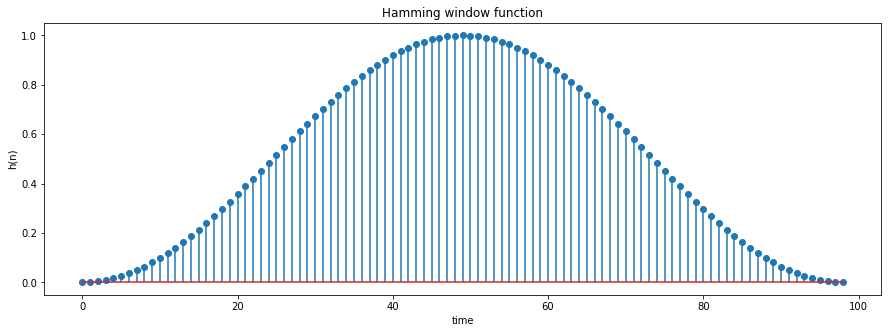

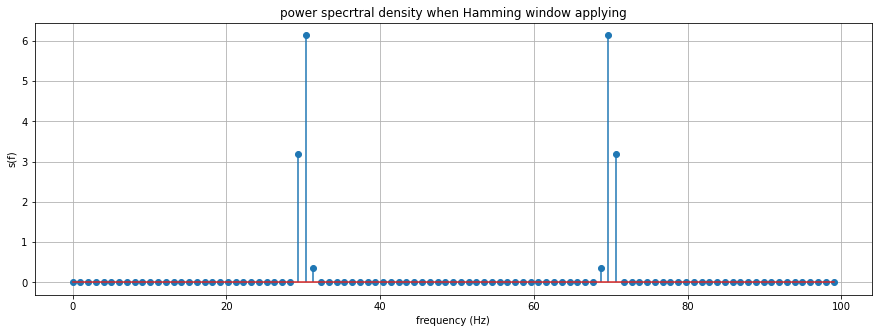

In [25]:
#hamming function
fig=plt.figure(figsize=(15,5))
hamm=hamming_function(n,N)
plt.stem(hann,use_line_collection=True)
plt.title('Hamming window function')
plt.ylabel('h(n)')
plt.xlabel('time')

window =signal*hamm
dft=DFT(window,N)
psd=dft*np.conj(dft)/N
fig=plt.figure(figsize=(15,5)) 
plt.stem(f,psd,use_line_collection=True)
plt.title('power specrtral density when Hamming window applying')
plt.ylabel('s(f)')
plt.xlabel('frequency (Hz)')
plt.grid()


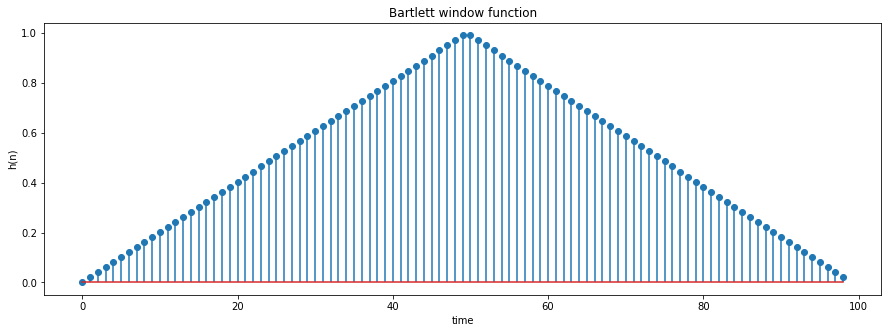

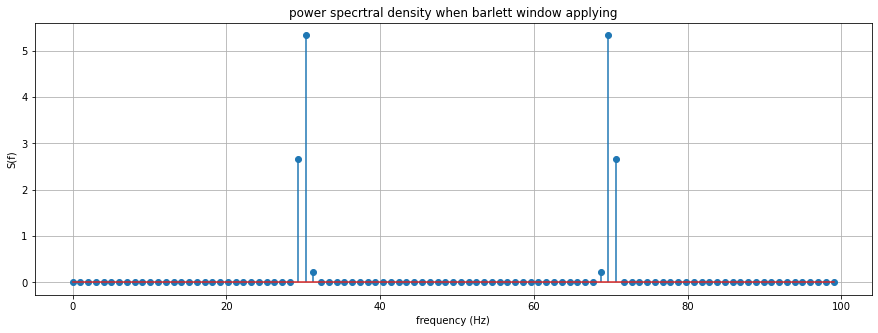

In [26]:
# bartlett window function
fig=plt.figure(figsize=(15,5))
burt=bartlett_function(n,N+1)
plt.stem(burt,use_line_collection=True)
plt.title('Bartlett window function')
plt.ylabel('h(n)')
plt.xlabel('time')

window =signal*burt
dft=DFT(window,N)
psd=dft*np.conj(dft)/N
fig=plt.figure(figsize=(15,5)) 
plt.stem(f,psd,use_line_collection=True)
plt.title('power specrtral density when barlett window applying')
plt.ylabel('S(f)')
plt.xlabel('frequency (Hz)')
plt.grid()


Q3. Consider the signal x(t) = cos(2πf1t) + cos(2πf2t) where f1 = 10 Hz and f2 = 30 Hz. The signal y(t) is the noisy
version of x(t) when x(t) is corrupted with white noise having zero mean and unit variance.


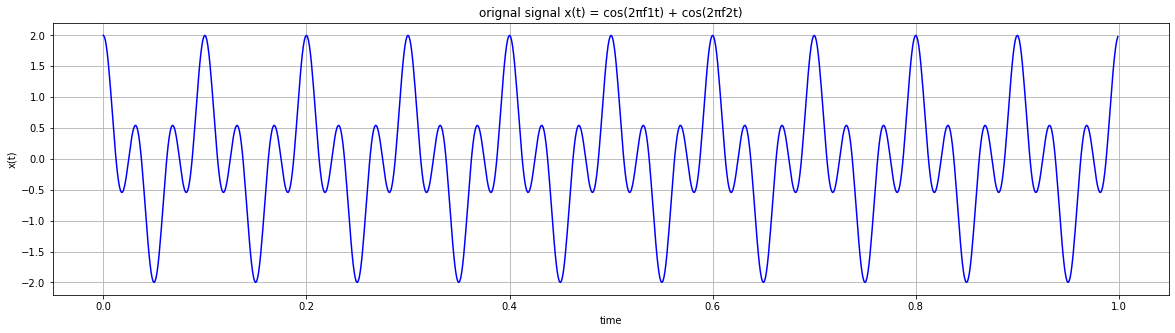

In [27]:
t=np.arange(0,1,.001)
f1=30
f2=10
orignal_signal=np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)    #input signal
noisy_signal=np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)+np.random.normal(0,1,1000)  # add white noise into clean signal
fig=plt.figure(figsize=(20,5))
plt.plot(t,orignal_signal,c='b')
plt.title('orignal signal x(t) = cos(2πf1t) + cos(2πf2t)')
plt.ylabel('x(t)')
plt.xlabel('time')
plt.grid()


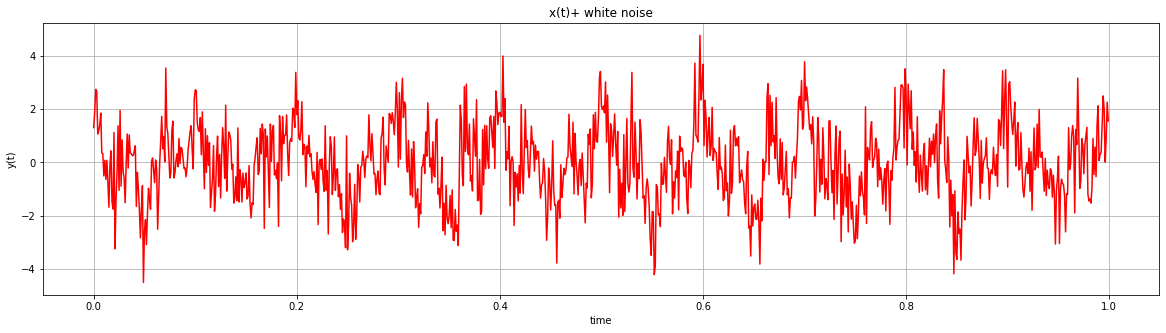

In [28]:
#plot noisy signal
fig=plt.figure(figsize=(20,5))
plt.plot(t,noisy_signal,c='r')
plt.title('x(t)+ white noise')
plt.ylabel('y(t)')
plt.xlabel('time')
plt.grid()

(a) Find the power spectral density of y(t) and show a labelled plot.

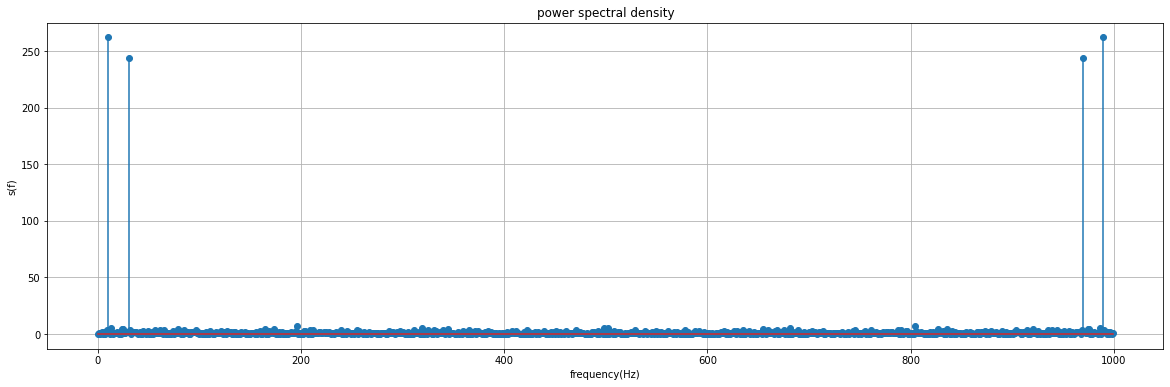

In [29]:
#power spectrum density of noisy signal
n=len(t)
dft=DFT(noisy_signal,n)
PSD=dft*np.conj(dft)/n
psd=PSD

#L=np.arange(1,np.floor(n/2),dtype='int')
f=np.arange(n)
fig=plt.figure(figsize=(20,6))
plt.stem(f,psd,use_line_collection=True)
plt.title('power spectral density')
plt.ylabel('s(f)')
plt.xlabel('frequency(Hz)')
plt.grid()

(b) From the PSD, find a suitable threshold for denoising the signal.


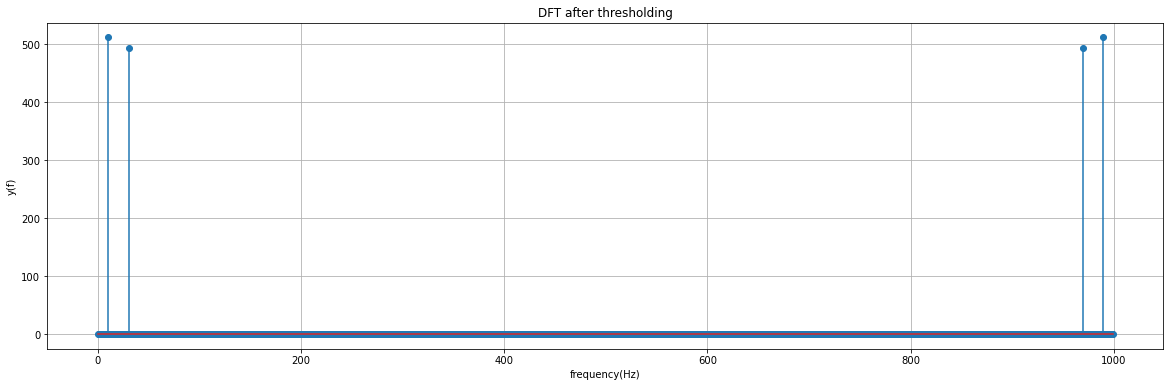

In [30]:
#Use the PSD to filter out noise
indices=PSD > 20      # we take thresold value 20
PSDclean=PSD*indices
dft=indices*dft
fig=plt.figure(figsize=(20,6))
plt.stem(dft,use_line_collection=True)
plt.title('DFT after thresholding')
plt.ylabel('y(f)')
plt.xlabel('frequency(Hz)')
plt.grid()

(c) Recover x(t) from y(t) using the threshold. Show the necessary plots.

C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'x(t)')

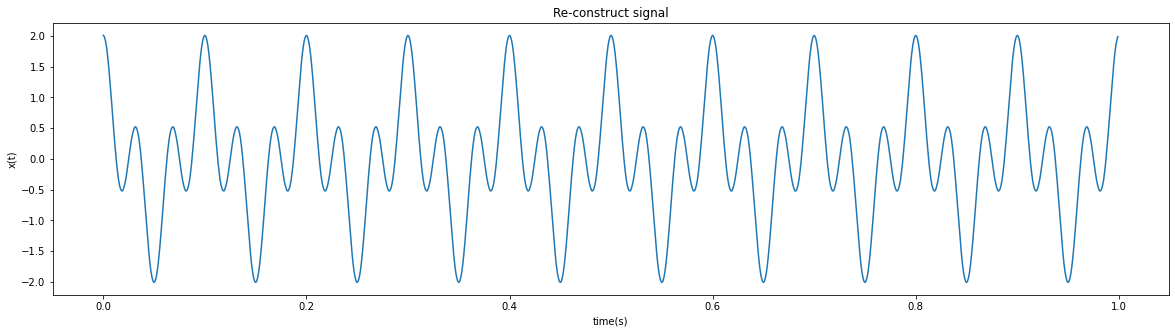

In [31]:
# recovering input signal fron dft through inverse dft
def inverse_dft(N,y):
    a=[]
    for n in range(N):
        total=0
        for i in range(N):
            total=total+y[i]*np.exp((1j*n*2*np.pi*i)/N)
        a.append(round((total/N),2))
        
    return (a) 
idft=inverse_dft(1000,dft)
fig=plt.figure(figsize=(20,5))
plt.plot(t,idft)
plt.title('Re-construct signal')
plt.xlabel('time(s)')
plt.ylabel('x(t)')